In [1]:
import pandas as pd
import numpy as np
from src.utils import regression, data_utils, plots, arima
import os

C:\Users\adity\AppData\Local\Temp\ipykernel_33188\1947628196.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
country_dfs = {}
country_codes = {"china": "CHN", "usa":"USA", "india":"IND", "albania":"ALB", "uk":"GBR", 
                 "korea":"KOR", "russia":"RUS", "ecuador":"ECU", "brazil":"BRA", "france":"FRA", 
                 "ghana":"GHA", "mexico":"MEX", "norway":"NOR", "switzerland":"CHE"}
for country_data in os.listdir("data/clean"):
    country_name = country_data.split("_")[2]
    country_df = data_utils.concatenate_gdp(f"data/clean/{country_data}", country_codes[country_name], "data/GDP_data.xlsx")
    country_df["Unnamed: 0"] = country_df["Unnamed: 0"].apply(lambda x: x.split()[0])
    country_df = country_df.drop(columns=["Military expenditure (current USD)"])
    country_df = country_df.rename(columns={"Unnamed: 0":"Year"})
    country_df = data_utils.concatenate_gdp_growth(country_df)
    country_dfs[country_name] = country_df

In [3]:
combined_df = pd.DataFrame({"Year":[],"Natural Log of GDP per capita (current US$)":[],
                            "Gross domestic savings (current US$)":[],
                            "Labor force, total":[], "Net trade in goods and services (BoP, current US$)":[],
                            "Consumer price index (2010 = 100)":[],"Foreign direct investment, net (BoP, current US$)":[],
                            "GDP":[], "gdp growth rate":[]})
for k,v in country_dfs.items():
    combined_df = combined_df._append(v)

combined_df

,Year,Natural Log of GDP per capita (current US$),Gross domestic savings (current US$),"Labor force, total","Net trade in goods and services (BoP, current US$)",Consumer price index (2010 = 100),"Foreign direct investment, net (BoP, current US$)",GDP,gdp growth rate
3,1993,5.906122,-4.562474e+08,1413557.0,-5.742000e+08,30.847167,-5.800000e+07,1.185315e+09,-0.415684
4,1994,6.374030,-2.973054e+08,1391914.0,-5.131000e+08,37.807846,-5.300000e+07,1.880951e+09,0.710641
5,1995,6.620879,-1.296032e+08,1363163.0,-5.325000e+08,40.754294,-7.000000e+07,2.392765e+09,2.668900
6,1996,6.917683,-1.148999e+08,1343448.0,-7.385000e+08,45.940473,-9.010000e+07,3.199641e+09,1.699400
7,1997,6.575606,-1.890798e+08,1360590.0,-5.864325e+08,61.183648,-4.750000e+07,2.258514e+09,0.200730
...,...,...,...,...,...,...,...,...,...
28,2018,11.048081,3.761145e+12,165307010.0,-5.786000e+11,115.157303,-3.454350e+11,2.053306e+13,0.127817
29,2019,11.083993,3.979476e+12,167100511.0,-5.593940e+11,117.244195,-2.010570e+11,2.138098e+13,0.143667
30,2020,11.059246,3.805933e+12,165641653.0,-6.528850e+11,118.690502,1.482990e+11,2.106047e+13,0.081281
31,2021,11.159381,4.058775e+12,166189867.0,-8.415800e+11,124.266414,-9.901500e+10,2.331508e+13,0.135490


In [4]:
combined_reg_df = data_utils.drop_rows_for_reg(combined_df)
combined_reg_df

,Year,Natural Log of GDP per capita (current US$),Gross domestic savings (current US$),"Labor force, total","Net trade in goods and services (BoP, current US$)",Consumer price index (2010 = 100),"Foreign direct investment, net (BoP, current US$)",GDP,gdp growth rate
0,1993,5.906122,-4.562474e+08,1413557.0,-5.742000e+08,30.847167,-5.800000e+07,1.185315e+09,-0.415684
1,1996,6.917683,-1.148999e+08,1343448.0,-7.385000e+08,45.940473,-9.010000e+07,3.199641e+09,1.699400
2,1999,6.940457,7.732440e+07,1325723.0,-5.567000e+08,74.101161,-4.120000e+07,3.212122e+09,0.003901
3,2002,7.262014,3.752461e+08,1308103.0,-1.160330e+09,82.382091,-1.350000e+08,4.348068e+09,0.353644
4,2005,7.891251,9.681241e+08,1266465.0,-2.039577e+09,86.671985,-2.584175e+08,8.052077e+09,0.851875
...,...,...,...,...,...,...,...,...,...
135,2008,10.790762,2.366335e+12,157246174.0,-7.123520e+11,98.737477,2.491000e+09,1.476986e+13,0.132727
136,2011,10.821097,2.389560e+12,157443452.0,-5.545170e+11,103.156842,1.731190e+11,1.559973e+13,0.056187
137,2014,10.917338,3.136701e+12,159540139.0,-4.839510e+11,108.566932,1.356730e+11,1.755068e+13,0.125063
138,2017,11.000561,3.517168e+12,163971527.0,-5.169350e+11,112.411557,2.859000e+10,1.947734e+13,0.109777


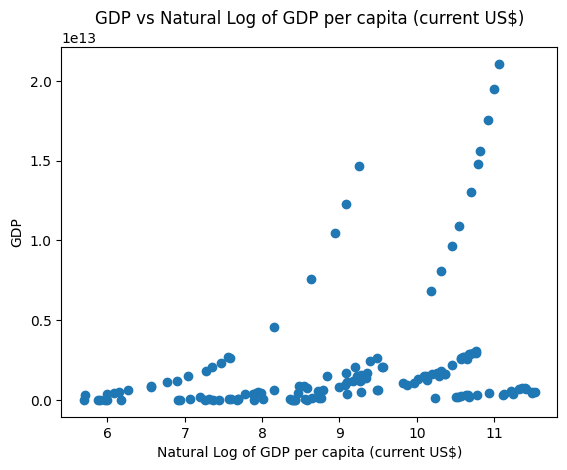

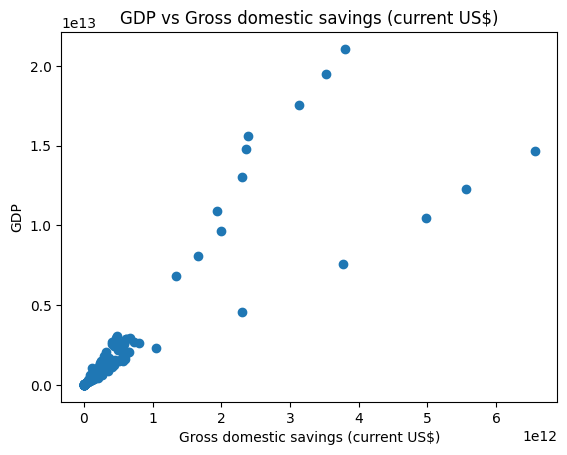

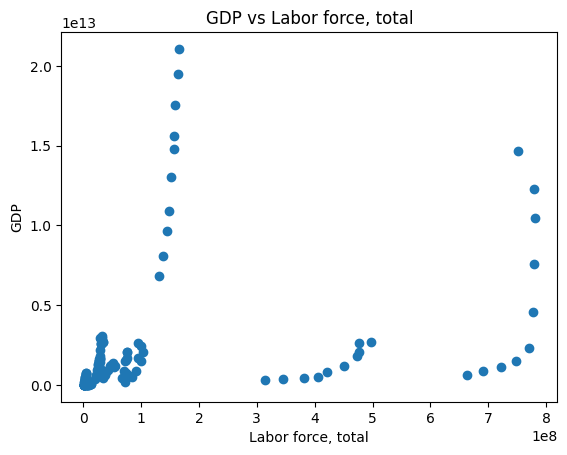

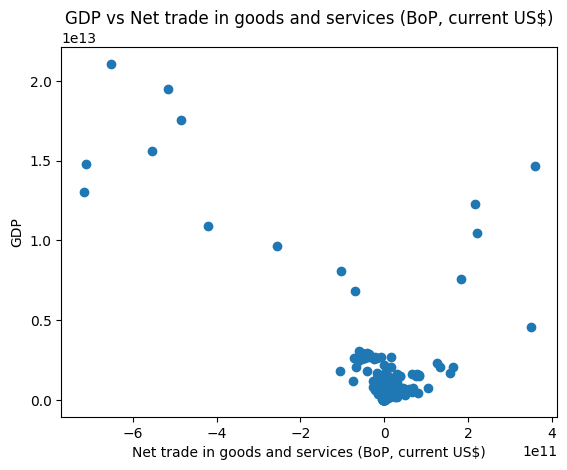

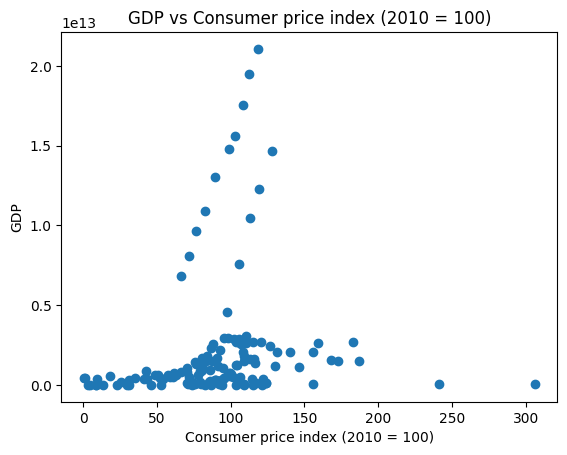

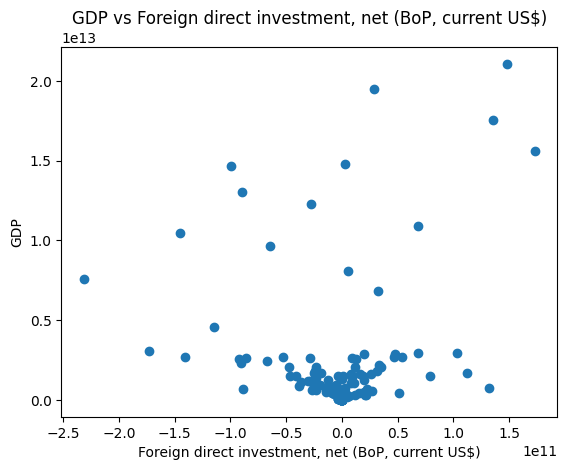

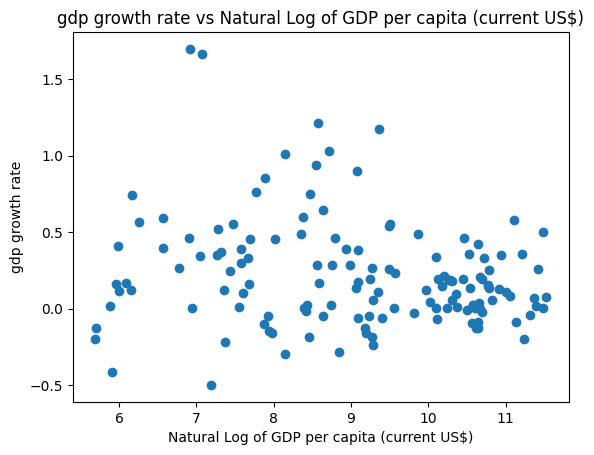

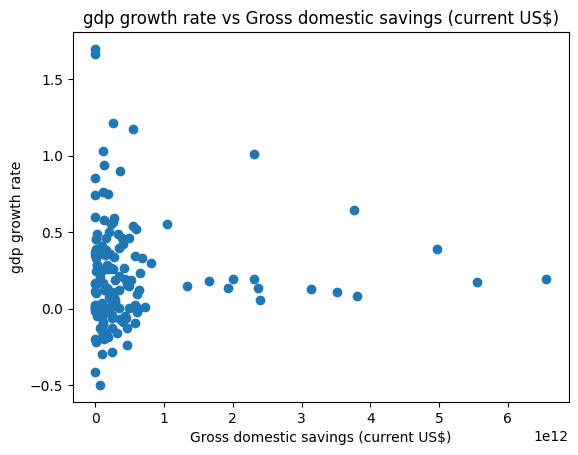

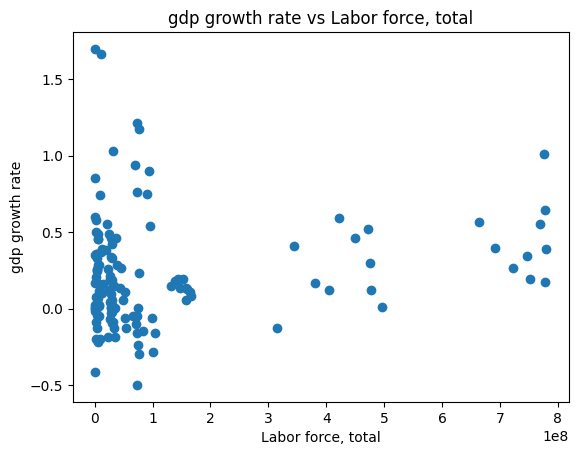

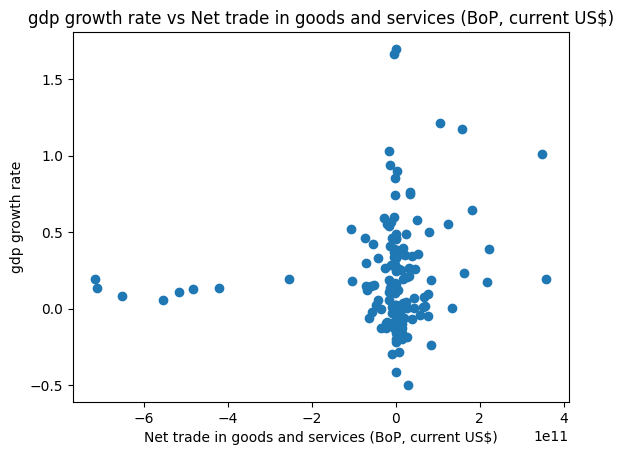

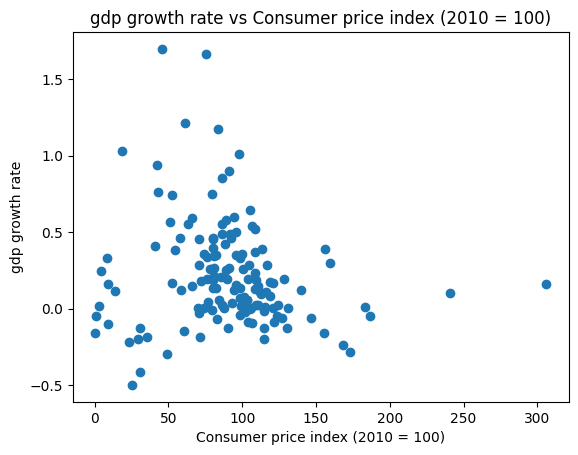

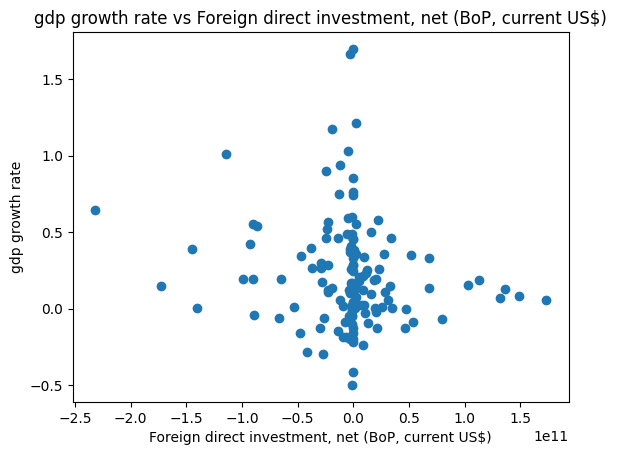

In [5]:
plots.plot_vs_gdp(combined_reg_df)
plots.plot_vs_gdp(combined_reg_df, growth_rate=True)

In [6]:
X, y = regression.create_regression_data_OLS(combined_reg_df)
OLS_model = regression.fit_OLS_model(X, y)
print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:        gdp growth rate   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.634
Date:                Wed, 24 Apr 2024   Prob (F-statistic):              0.142
Time:                        01:43:51   Log-Likelihood:                -47.512
No. Observations:                 140   AIC:                             109.0
Df Residuals:                     133   BIC:                             129.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [7]:
OLS_model_cluster_cov = regression.fit_OLS_model(X, y, cov_type="cluster")
print(OLS_model_cluster_cov.summary())

                            OLS Regression Results                            
Dep. Variable:        gdp growth rate   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     579.4
Date:                Wed, 24 Apr 2024   Prob (F-statistic):            0.00172
Time:                        01:43:54   Log-Likelihood:                -47.512
No. Observations:                 140   AIC:                             109.0
Df Residuals:                     133   BIC:                             129.6
Df Model:                           6                                         
Covariance Type:              cluster                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

c:\Users\adity\OneDrive\Documents\college\2-2\EGD\egd-assignment\egd-env\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 2
  warnings.warn('covariance of constraints does not have full '


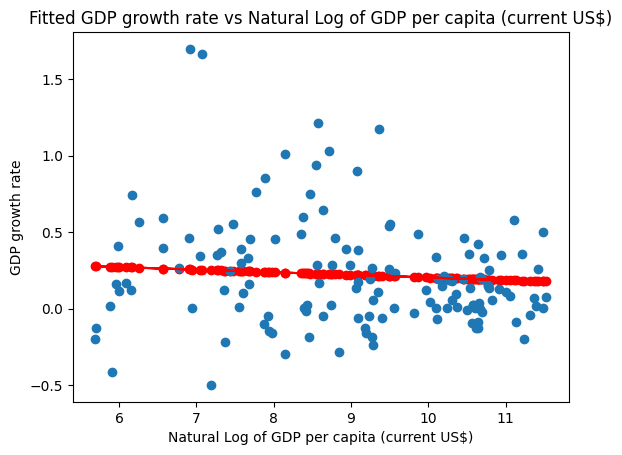

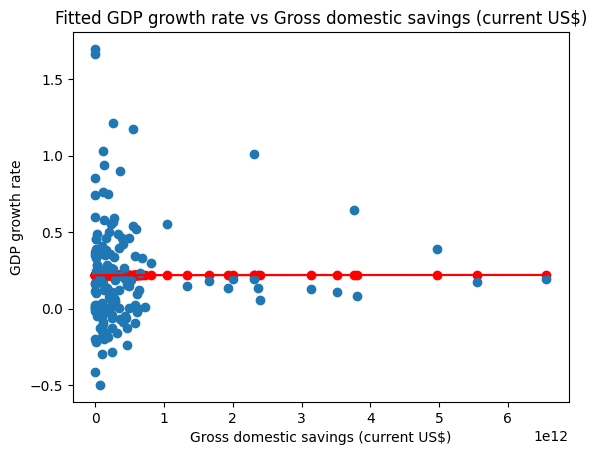

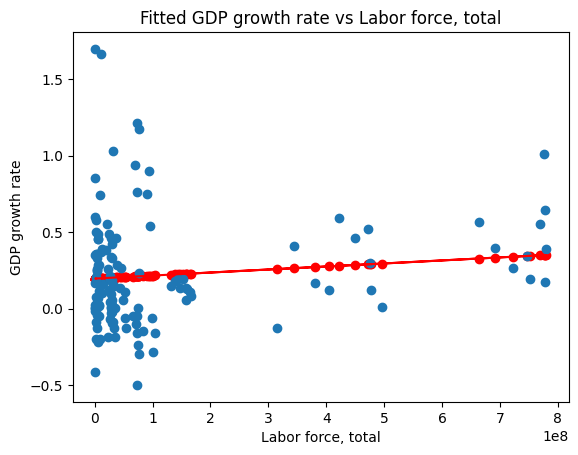

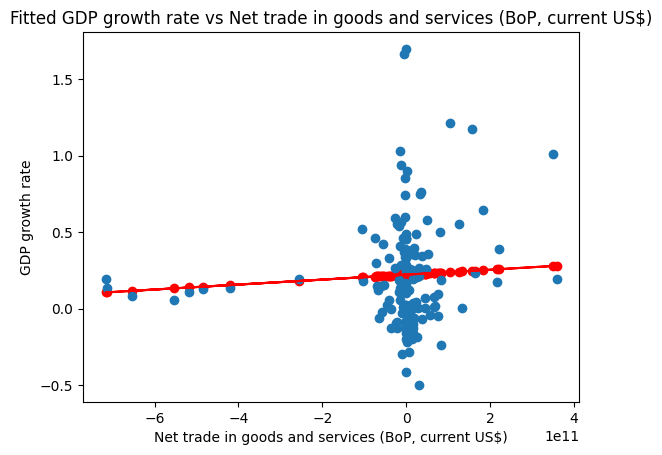

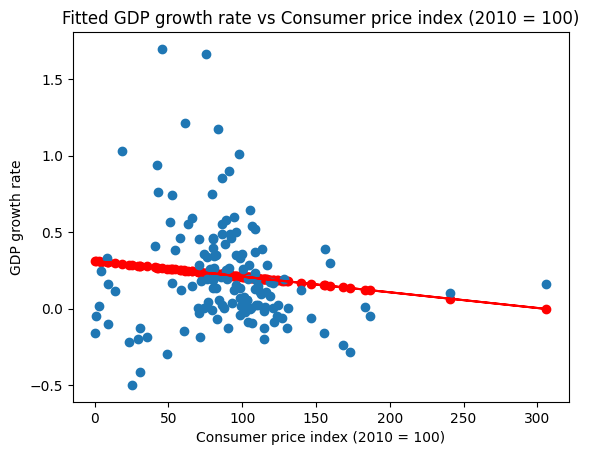

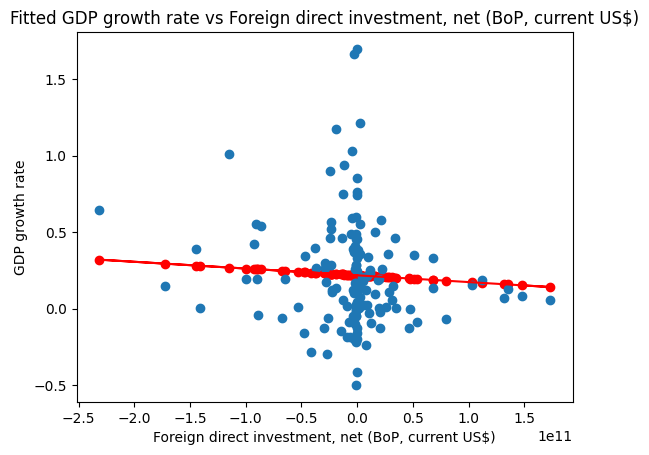

In [8]:
plots.plot_reg_lines(combined_reg_df,X, y, OLS_model)

In [9]:
"""clustered_residuals = OLS_model_cluster_cov.resid
clustered_robust_se = np.sqrt(OLS_model_cluster_cov.cov_params().diagonal())
residuals = OLS_model.resid
residuals_variance = np.var(residuals)
heteroskedasticity_weights = 1/residuals_variance

combined_weights = clustered_robust_se*heteroskedasticity_weights
normalized_weights = combined_weights / np.sum(combined_weights) * 3
weights = np.repeat(normalized_weights, 3)"""

'clustered_residuals = OLS_model_cluster_cov.resid\nclustered_robust_se = np.sqrt(OLS_model_cluster_cov.cov_params().diagonal())\nresiduals = OLS_model.resid\nresiduals_variance = np.var(residuals)\nheteroskedasticity_weights = 1/residuals_variance\n\ncombined_weights = clustered_robust_se*heteroskedasticity_weights\nnormalized_weights = combined_weights / np.sum(combined_weights) * 3\nweights = np.repeat(normalized_weights, 3)'

In [10]:
"""weights = np.repeat(1/OLS_model.resid**2, 140)
WLS_model = regression.fit_WLS_model(X, y, weights)
print(WLS_model.summary())"""

'weights = np.repeat(1/OLS_model.resid**2, 140)\nWLS_model = regression.fit_WLS_model(X, y, weights)\nprint(WLS_model.summary())'

In [11]:
#plots.plot_reg_lines(combined_reg_df,X, y, WLS_model)

In [12]:
dropped_X, dropped_y = regression.create_regression_data_OLS(combined_reg_df, drop=["Gross domestic savings (current US$)"])
OLS_model_cluster_cov_dropped = regression.fit_OLS_model(dropped_X, dropped_y, cov_type="cluster")
print(OLS_model_cluster_cov_dropped.summary())


                            OLS Regression Results                            
Dep. Variable:        gdp growth rate   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):            0.00366
Time:                        01:43:55   Log-Likelihood:                -47.512
No. Observations:                 140   AIC:                             107.0
Df Residuals:                     134   BIC:                             124.7
Df Model:                           5                                         
Covariance Type:              cluster                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

c:\Users\adity\OneDrive\Documents\college\2-2\EGD\egd-assignment\egd-env\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [13]:
X_arima, y_arima = arima.get_timeseries_dataset(combined_reg_df)
arima_model = arima.fit_arima_model(X_arima, y_arima)
print(arima_model.summary())

c:\Users\adity\OneDrive\Documents\college\2-2\EGD\egd-assignment\src\utils\arima.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Year"] = pd.to_datetime(df["Year"], format="%Y", errors='coerce')
c:\Users\adity\OneDrive\Documents\college\2-2\EGD\egd-assignment\egd-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adity\OneDrive\Documents\college\2-2\EGD\egd-assignment\egd-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self

                               SARIMAX Results                                
Dep. Variable:        gdp growth rate   No. Observations:                  140
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -49.254
Date:                Wed, 24 Apr 2024   AIC                            118.507
Time:                        01:43:55   BIC                            147.924
Sample:                             0   HQIC                           130.461
                                - 140                                         
Covariance Type:                  opg                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  0.4444   6.94e-19    6.4e+17      0.000       0.444       0.444
Natural Log

c:\Users\adity\OneDrive\Documents\college\2-2\EGD\egd-assignment\egd-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
